In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
ipl = pd.read_csv('matches.csv')

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
ipl.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ipl.shape

(636, 18)

In [8]:
ipl['season']=ipl['season'].astype('category')

In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               636 non-null    int64   
 1   season           636 non-null    category
 2   city             629 non-null    object  
 3   date             636 non-null    object  
 4   team1            636 non-null    object  
 5   team2            636 non-null    object  
 6   toss_winner      636 non-null    object  
 7   toss_decision    636 non-null    object  
 8   result           636 non-null    object  
 9   dl_applied       636 non-null    int64   
 10  winner           633 non-null    object  
 11  win_by_runs      636 non-null    int64   
 12  win_by_wickets   636 non-null    int64   
 13  player_of_match  633 non-null    object  
 14  venue            636 non-null    object  
 15  umpire1          635 non-null    object  
 16  umpire2          635 non-null    object  
 1

###  finding the venue in which highest number of matches were held

In [10]:
venue=ipl.groupby('venue')
venue.size().sort_values().reset_index().tail(1)

,venue,0
34,M Chinnaswamy Stadium,66


### Team winning most number of matches since 2008

In [11]:
ipl['winner'].value_counts().sort_values().tail(1)

Mumbai Indians    92
Name: winner, dtype: int64

### Team winning least number of matches

In [12]:
ipl['winner'].value_counts().sort_values().head(1).index[0]

'Rising Pune Supergiants'

### Team who played most number of matches. note down winning doesnt matter

In [13]:
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).sort_values().tail(1)

Mumbai Indians    157
dtype: int64

### List out all team names since 2008

In [14]:
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).drop_duplicates().index[::1]

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype='object')

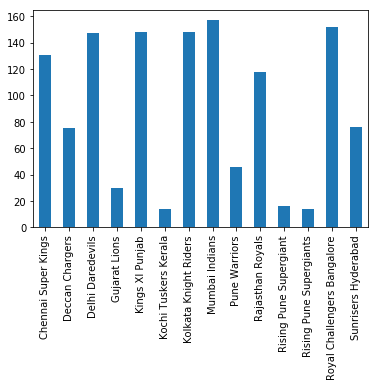

In [14]:
#plot bar graph for the teams and their number of matches played
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).plot.bar()

### List out each seasons winners.  
logic is that each seasons last match is the final match and its winner is the seasons winner

In [15]:
x=ipl.drop_duplicates('season',keep='last')

In [16]:
x[['season','winner']].sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


### How many times each team has won the finals

In [17]:
x['winner'].value_counts().reset_index()

,index,winner
0,Mumbai Indians,3
1,Chennai Super Kings,2
2,Kolkata Knight Riders,2
3,Rajasthan Royals,1
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1


In [18]:
ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


### Finding out whether the toss winner of the game has actually won the game by his decision to bat or field first?  

In [19]:
toss_data = ipl[['season','city','venue','toss_winner','toss_decision','winner']].copy()

In [20]:
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner
0,2017,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,2017,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,field,Rising Pune Supergiant
2,2017,Rajkot,Saurashtra Cricket Association Stadium,Kolkata Knight Riders,field,Kolkata Knight Riders
3,2017,Indore,Holkar Cricket Stadium,Kings XI Punjab,field,Kings XI Punjab
4,2017,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
5,2017,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,field,Sunrisers Hyderabad
6,2017,Mumbai,Wankhede Stadium,Mumbai Indians,field,Mumbai Indians
7,2017,Indore,Holkar Cricket Stadium,Royal Challengers Bangalore,bat,Kings XI Punjab
8,2017,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,field,Delhi Daredevils
9,2017,Mumbai,Wankhede Stadium,Mumbai Indians,field,Mumbai Indians


In [21]:
toss_data['toss_with_bat']=""
toss_data['toss_with_field']=""

In [22]:
d1 = toss_data['toss_winner']==toss_data['winner']

In [23]:
toss_data = toss_data[d1].sort_values('toss_winner')

In [24]:
def findValues_for_bat(toss_decision):
    if toss_decision=='bat':
        return 'yes'
    else:
        return 'no'
def findValues_for_field(toss_decision):
    if toss_decision=='field':
        return 'yes'
    else:
        return 'no'

In [25]:
toss_data['toss_with_bat']=toss_data['toss_decision'].apply(findValues_for_bat)
toss_data['toss_with_field']=toss_data['toss_decision'].apply(findValues_for_field)

In [26]:
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner,toss_with_bat,toss_with_field
520,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
181,2010,Kolkata,Eden Gardens,Chennai Super Kings,bat,Chennai Super Kings,yes,no
445,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
60,2008,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,yes,no
303,2011,Mumbai,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,no,yes
424,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
306,2011,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
421,2013,Pune,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,Chennai Super Kings,yes,no
86,2008,Delhi,Feroz Shah Kotla,Chennai Super Kings,field,Chennai Super Kings,no,yes
541,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no


In [27]:
toss_data=toss_data.rename(columns={'toss_with_bat':'bat first','toss_with_field':'field first'})
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner,bat first,field first
520,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
181,2010,Kolkata,Eden Gardens,Chennai Super Kings,bat,Chennai Super Kings,yes,no
445,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
60,2008,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,yes,no
303,2011,Mumbai,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,no,yes
424,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
306,2011,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
421,2013,Pune,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,Chennai Super Kings,yes,no
86,2008,Delhi,Feroz Shah Kotla,Chennai Super Kings,field,Chennai Super Kings,no,yes
541,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no


In [28]:
#toss_data = toss_data.drop(['venue','city','winner'],axis=1)

In [29]:
t = toss_data.groupby(['season','toss_winner','bat first'],sort=True)
#t = toss_data.groupby(['season','toss_winner','toss_decision'],sort=True)

In [30]:
t.size().head(15)

season  toss_winner            bat first
2008    Chennai Super Kings    no           1
                               yes          2
        Deccan Chargers        no           2
                               yes          0
        Delhi Daredevils       no           2
                               yes          0
        Gujarat Lions          no           0
                               yes          0
        Kings XI Punjab        no           3
                               yes          1
        Kochi Tuskers Kerala   no           0
                               yes          0
        Kolkata Knight Riders  no           0
                               yes          3
        Mumbai Indians         no           4
dtype: int64

In [32]:
t.describe()

city                             venue                                                                toss_decision                    winner                                          field first                 
                                             count unique             top freq count unique                                                top freq         count unique    top freq  count unique                          top freq       count unique  top freq
season toss_winner                 bat first                                                                                                                                                                                                                     
2008   Chennai Super Kings         no            1      1           Delhi    1     1      1                                   Feroz Shah Kotla    1             1      1  field    1      1      1          Chennai Super Kings    1           1      1  yes    1
                                   yes           2      2      Chandigarh    1     2      2         Punjab Cricket Association Stadium, Mohali    1             2      1    bat    2      2      1          Chennai Super Kings    2           2      1   no    2
       Deccan Chargers             no            2      2          Mumbai    1     2      2                         Dr DY Patil Sports Academy    1             2      1  field    2      2      1              Deccan Chargers    2           2      1  yes    2
       Delhi Daredevils            no            2      2       Bangalore    1     2      2                              M Chinnaswamy Stadium    1             2      1  field    2      2      1             Delhi Daredevils    2           2      1  yes    2
       Kings XI Punjab             no            3      3      Chandigarh    1     3      3         Punjab Cricket Association Stadium, Mohali    1             3      1  field    3      3      1              Kings XI Punjab    3           3      1  yes    3
                                   yes           1      1      Chandigarh    1     1      1         Punjab Cricket Association Stadium, Mohali    1             1      1    bat    1      1      1              Kings XI Punjab    1           1      1   no    1
       Kolkata Knight Riders       yes           3      2         Kolkata    2     3      2                                       Eden Gardens    2             3      1    bat    3      3      1        Kolkata Knight Riders    3           3      1   no    3
       Mumbai Indians              no            4      2          Mumbai    3     4      3                                   Wankhede Stadium    2             4      1  field    4      4      1               Mumbai Indians    4           4      1  yes    4
       Rajasthan Royals            no            7      5          Jaipur    3     7      5                             Sawai Mansingh Stadium    3             7      1  field    7      7      1             Rajasthan Royals    7           7      1  yes    7
                                   yes           2      2          Jaipur    1     2      2                             Sawai Mansingh Stadium    1             2      1    bat    2      2      1             Rajasthan Royals    2           2      1   no    2
       Royal Challengers Bangalore yes           1      1         Chennai    1     1      1                    MA Chidambaram Stadium, Chepauk    1             1      1    bat    1      1      1  Royal Challengers Bangalore    1           1      1   no    1
2009   Chennai Super Kings         yes           4      4          Durban    1     4      4                                          Kingsmead    1             4      1    bat    4      4      1          Chennai Super Kings    4           4      1   no    4
       Deccan Chargers             no            3      3          Durban    1     3      3                                          Kingsmead    1             3      1  field 

In [33]:
delivery = pd.read_csv('deliveries.csv')

In [34]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [35]:
delivery.shape

(150460, 21)

In [36]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder'], dtype='object')

In [37]:
delivery.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


### Top 5 batsman in ipl according to most number of runs?

In [38]:
t=delivery.groupby(['batsman'])['batsman_runs'].sum()

In [39]:
t.sort_values(ascending=False).head(5)

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

### which batsman has played most number of balls

In [40]:
t=delivery.groupby(['batsman'])

In [41]:
t['batsman_runs'].count().sort_values(ascending=False).head(5) 
# logic is each row is one ball

batsman
V Kohli      3494
G Gambhir    3433
SK Raina     3369
RG Sharma    3274
S Dhawan     3005
Name: batsman_runs, dtype: int64

### which batsman has hit highest number of 4s

In [43]:
mask=delivery['batsman_runs']==4

In [44]:
delivery_fours = delivery[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
# count() instead of sum() because we need to count the number of 4s instead of summing the total runs gained by hitting a boundary

In [45]:
delivery_fours.head(5)

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

### How many total fours in ipl till now

In [46]:
len(delivery[mask])

17033

### Which batsman has hit highest number of 6's

In [47]:
mask=delivery['batsman_runs']==6
delivery_fours = delivery[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
delivery_fours.head(5)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

### Which bowler has given most no. of dot balls

In [48]:
mask = delivery['total_runs']==0
delivery_dot = delivery[mask]
delivery_dot.groupby('bowler')['total_runs'].count().sort_values(ascending=False).head(5)

bowler
P Kumar            1075
Harbhajan Singh    1062
SL Malinga         1060
DW Steyn            978
A Mishra            953
Name: total_runs, dtype: int64

### Batsman which when on non-striker end, there has been most dismissals  
Case 1: Only the striker is dismissed everytime  
Case 2: The striker and non-striker both can be dismissed  
Sir's version runs for case 1 and 2 both and my version runs only for case 1.

In [49]:
#My version - only works for case 1
delivery_dismissal1 = delivery.dropna(subset=['player_dismissed'])
mask=delivery_dismissal1['batsman']==delivery_dismissal1['player_dismissed']
delivery_dismissal1 = delivery_dismissal1[mask]
ans=delivery_dismissal1.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head().reset_index()
#delivery_dismissal1.shape
ans

,non_striker,player_dismissed
0,RG Sharma,170
1,V Kohli,150
2,SK Raina,138
3,G Gambhir,135
4,RV Uthappa,134


In [50]:
#Sirs version - works for both the cases but actually the question asked just for case 1
delivery_dismissal2 = delivery.fillna({'player_dismissed':'Not'})
mask=delivery_dismissal2['player_dismissed']!='Not'
#mask1=delivery_dismissal2['player_dismissed']!=delivery_dismissal2['non_striker']
#delivery_dismissal2 = delivery_dismissal2[mask & mask1]
delivery_dismissal2 = delivery_dismissal2[mask]
ans1=delivery_dismissal2.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head(10).reset_index()
#delivery_dismissal2.shape
ans1

,non_striker,player_dismissed
0,RG Sharma,171
1,V Kohli,151
2,SK Raina,145
3,G Gambhir,142
4,RV Uthappa,138
5,KD Karthik,125
6,MS Dhoni,120
7,AB de Villiers,120
8,S Dhawan,116
9,DA Warner,112


In [51]:
#Finding the cases when the non-striker was the player_dismissed
dell = delivery.dropna(subset=['player_dismissed'])
mask = dell['non_striker']==dell['player_dismissed']
mask1 = dell['non_striker']=='RG Sharma'
dell = dell[mask & mask1]
dell.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head(10).reset_index()

,non_striker,player_dismissed
0,RG Sharma,1


In [53]:
# Finding the batsmans and the team they have hit most number of runs against
hit_runs = delivery.groupby(['bowling_team','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=['bowling_team'],keep='first')
hit_runs

,bowling_team,batsman,batsman_runs
0,Kings XI Punjab,CH Gayle,797
1,Kolkata Knight Riders,RG Sharma,710
2,Mumbai Indians,SK Raina,708
3,Chennai Super Kings,V Kohli,706
8,Delhi Daredevils,RG Sharma,670
11,Royal Challengers Bangalore,G Gambhir,644
31,Rajasthan Royals,AB de Villiers,485
50,Sunrisers Hyderabad,V Kohli,439
76,Pune Warriors,CH Gayle,383
99,Deccan Chargers,R Dravid,339


In [54]:
# Finding virat has hit most runs against which team
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]

'Chennai Super Kings'

In [55]:
def opp_team_most_runs(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    ans=bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]
    return ans

In [56]:
opp_team_most_runs('RG Sharma')

'Kolkata Knight Riders'

### making a function which takes one argument:- batsman and return which bowler has givn highest number of runs to that batsman

In [57]:
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).head()

bowler
A Mishra     149
UT Yadav     141
DJ Bravo     130
R Ashwin     127
RA Jadeja    104
Name: batsman_runs, dtype: int64

In [58]:
def most_runs_taken_from_bowler(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    return bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).index[0]

In [59]:
most_runs_taken_from_bowler('V Kohli')

'A Mishra'

### in each over which team has hit how many sixes

In [60]:
# Pivot_table method
sixes = delivery[delivery['batsman_runs']==6]
y=sixes.pivot_table(index=['batting_team'],columns=['over'],values='batsman_runs',aggfunc='count')
print(y)

over                           1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20
batting_team                                                                                                                                       
Chennai Super Kings           5.0  17.0  37.0  34.0  41.0  43.0  22.0  25.0  23.0  23.0  36.0  36.0  35.0  45.0  43.0  46.0  51.0  58.0  54.0  68.0
Deccan Chargers               3.0  21.0  11.0  17.0  27.0  22.0  11.0  13.0  17.0  14.0  15.0  26.0  23.0  22.0  20.0  21.0  38.0  37.0  23.0  19.0
Delhi Daredevils             14.0  19.0  30.0  41.0  29.0  27.0  20.0  26.0  32.0  24.0  34.0  38.0  37.0  35.0  28.0  43.0  56.0  44.0  59.0  50.0
Gujarat Lions                 4.0   6.0  14.0   9.0  11.0  12.0  10.0   6.0  11.0   8.0   5.0   7.0   5.0   8.0   5.0   5.0   7.0   9.0   9.0   4.0
Kings XI Punjab              10.0  19.0  27.0  36.0  30.0  39.0  19.0  35.0  36.0  29.0  37.0  38.0  47.0  41.0 

In [61]:
# Groupby method
sixes.groupby(['batting_team','over'])['batsman_runs'].count().head(10)

batting_team         over
Chennai Super Kings  1        5
                     2       17
                     3       37
                     4       34
                     5       41
                     6       43
                     7       22
                     8       25
                     9       23
                     10      23
Name: batsman_runs, dtype: int64

In [62]:
import seaborn as sns

<Axes: xlabel='over', ylabel='batting_team'>

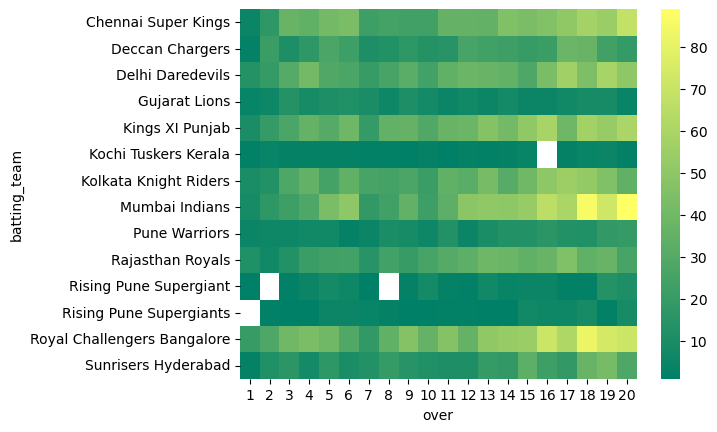

In [63]:
sns.heatmap(y,cmap='summer')

### Q) find the orange cap holders of each season

In [64]:
merged_data = ipl.merge(delivery,left_on='id',right_on='match_id')

In [65]:
merged_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [66]:
df = merged_data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [67]:
df.sort_values('batsman_runs').drop_duplicates(subset=['season'],keep='last').sort_values('season')

,season,batsman,batsman_runs
372,2008,SE Marsh,616
712,2009,ML Hayden,572
1311,2010,SR Tendulkar,618
1468,2011,CH Gayle,608
1929,2012,CH Gayle,733
2547,2013,MEK Hussey,733
3106,2014,RV Uthappa,660
3330,2015,DA Warner,562
4119,2016,V Kohli,973
4252,2017,DA Warner,641


## last 5 overs (death overs) who is the most dangerous batsman, strike rate (no. of runs divided by number of balls)*100.  
### base criteria is player has played 200 balls, (between 16 and 20 overs he has completed 200 balls)

In [68]:
mask = merged_data['over']>15

In [69]:
# Only for death overs that is from 16-20 both inclusive
danger = merged_data[mask]
danger.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
93,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
95,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
99,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,1,DJ Hooda,Yuvraj Singh,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
100,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,2,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
101,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,3,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
102,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [70]:
# Finding each batsmans total runs in history in death overs
runs = danger.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index()
runs.head(10)

,batsman,batsman_runs
0,MS Dhoni,2076
1,KA Pollard,1352
2,RG Sharma,1314
3,AB de Villiers,1203
4,V Kohli,993
5,YK Pathan,930
6,Yuvraj Singh,883
7,JP Duminy,869
8,SK Raina,767
9,RA Jadeja,753


In [71]:
# Finding number of balls played by each batsman in death overs
balls = danger.groupby('batsman')['ball'].count().sort_values(ascending=False).reset_index()
balls.head(10)

,batsman,ball
0,MS Dhoni,1224
1,KA Pollard,838
2,RG Sharma,748
3,YK Pathan,584
4,RA Jadeja,576
5,AB de Villiers,570
6,V Kohli,546
7,JP Duminy,518
8,Yuvraj Singh,516
9,IK Pathan,465


In [72]:
# Merging runs and ball values in a single dataframe for simplicity
balls_and_runs = balls.merge(runs,left_on='batsman',right_on='batsman')

In [73]:
balls_and_runs = balls_and_runs[balls_and_runs['ball']>=200]
len(balls_and_runs)

44

In [74]:
balls_and_runs['strike']=0

In [75]:
balls_and_runs['strike']=(balls_and_runs['batsman_runs']/balls_and_runs['ball'])*100
balls_and_runs.sort_values('strike',ascending=False).head(2)

,batsman,ball,batsman_runs,strike
5,AB de Villiers,570,1203,211.052632
38,DA Warner,228,432,189.473684


### Q2) top 10 batsman, and top 10 bowlers with max number of wickets and combine them and make a heatmap which tells which top batsman has hitten most runs against a top bowler

In [76]:
top_bowlers=delivery.dropna(subset=['player_dismissed']).copy()
top_bowlers[top_bowlers['bowler']==top_bowlers['fielder']].reset_index().head(10)

,index,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,557,3,1,Gujarat Lions,Kolkata Knight Riders,11,2,AJ Finch,SK Raina,Kuldeep Yadav,0,0,0,0,0,0,0,0,0,AJ Finch,caught,Kuldeep Yadav
1,2700,12,1,Royal Challengers Bangalore,Mumbai Indians,18,7,P Negi,KM Jadhav,JJ Bumrah,0,0,0,0,0,0,0,0,0,KM Jadhav,run out,JJ Bumrah
2,5632,24,1,Mumbai Indians,Delhi Daredevils,19,7,HH Pandya,Harbhajan Singh,K Rabada,0,0,0,0,0,0,0,0,0,Harbhajan Singh,run out,K Rabada
3,5966,25,2,Rising Pune Supergiant,Sunrisers Hyderabad,14,1,MS Dhoni,RA Tripathi,Rashid Khan,0,0,0,0,0,0,0,0,0,RA Tripathi,run out,Rashid Khan
4,6129,26,1,Kings XI Punjab,Gujarat Lions,20,6,WP Saha,MM Sharma,Basil Thampi,0,0,0,0,0,0,0,0,0,WP Saha,run out,Basil Thampi
5,6680,28,2,Mumbai Indians,Rising Pune Supergiant,20,5,Harbhajan Singh,MJ McClenaghan,JD Unadkat,0,0,0,0,0,0,1,0,1,MJ McClenaghan,run out,JD Unadkat
6,7766,33,2,Royal Challengers Bangalore,Rising Pune Supergiant,8,4,KM Jadhav,V Kohli,LH Ferguson,0,0,0,0,0,0,0,0,0,KM Jadhav,run out,LH Ferguson
7,7963,34,1,Gujarat Lions,Mumbai Indians,19,7,JP Faulkner,AJ Tye,JJ Bumrah,0,0,0,0,0,0,0,0,0,AJ Tye,run out,JJ Bumrah
8,8386,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,20,6,Yuvraj Singh,KS Williamson,NM Coulter-Nile,0,0,0,0,0,0,1,0,1,KS Williamson,run out,NM Coulter-Nile
9,12427,53,1,Mumbai Indians,Kolkata Knight Riders,16,6,AT Rayudu,SS Tiwary,UT Yadav,0,0,0,0,0,0,0,0,0,SS Tiwary,run out,UT Yadav


In [77]:
l=list()
for i,row in top_bowlers.iterrows():
    if row['dismissal_kind']=='run out' or row['dismissal_kind']=='retired hurt' or row['dismissal_kind']=='obstructing the field':
        l.append(i)
for i in l:
    top_bowlers.drop(i,inplace=True)

In [78]:
top_bowlers.shape

(6673, 21)

In [79]:
top_bowlers=top_bowlers.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).reset_index().head(10)
#top_bowlers.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).reset_index()

In [80]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index().head(10)

In [81]:
#mask1=top_bowlers['bowler']==delivery['bowler']
#mask2=top_batsman['batsman']==delivery['batsman']
#bat_and_bowl = delivery.mask(top_bowlers['bowler']==delivery['bowler'],top_batsman['batsman']==delivery['batsman'])
top_batsman.head()

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014


In [82]:
top_bowlers

,bowler,player_dismissed
0,SL Malinga,154
1,A Mishra,134
2,Harbhajan Singh,127
3,PP Chawla,126
4,DJ Bravo,122
5,B Kumar,111
6,A Nehra,106
7,R Vinay Kumar,103
8,Z Khan,102
9,R Ashwin,100


In [83]:
ex=delivery.copy()
ex['top_batsmans']=0.0
ex['top_bowlers']=0.0
ex.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,top_batsmans,top_bowlers
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0.0,0.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0.0,0.0
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,0.0,0.0
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0.0,0.0
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0.0,0.0
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,0.0,0.0


In [84]:
for i,row in top_batsman.iterrows():
    e=str(row['batsman'])
    for j,r in ex.iterrows():
        if str(r['batsman'])==e:
            result=1
            ex.at[j,'top_batsmans']=result
    print('done with ',e)
print('done with batsman')

done with  SK Raina
done with  V Kohli
done with  RG Sharma
done with  G Gambhir
done with  DA Warner
done with  RV Uthappa
done with  CH Gayle
done with  S Dhawan
done with  MS Dhoni
done with  AB de Villiers
done with batsman


In [85]:
for i,row in top_bowlers.iterrows():
    e=row['bowler']
    for j,r in ex.iterrows():
        if r['bowler']==e:
            ex.at[j,'top_bowlers']=1 
    print('done with ',e)

done with  SL Malinga
done with  A Mishra
done with  Harbhajan Singh
done with  PP Chawla
done with  DJ Bravo
done with  B Kumar
done with  A Nehra
done with  R Vinay Kumar
done with  Z Khan
done with  R Ashwin


In [86]:
mask1=ex['top_batsmans']==1
mask2=ex['top_bowlers']==1
y=ex[mask1 & mask2].pivot_table(index='batsman',columns='bowler',values='batsman_runs',aggfunc='sum')
y

bowler,A Mishra,A Nehra,B Kumar,DJ Bravo,Harbhajan Singh,PP Chawla,R Ashwin,R Vinay Kumar,SL Malinga,Z Khan
batsman,,,,,,,,,,
AB de Villiers,9.0,61.0,48.0,69.0,80.0,43.0,42.0,16.0,76.0,28.0
CH Gayle,45.0,45.0,104.0,53.0,78.0,103.0,49.0,0.0,47.0,34.0
DA Warner,37.0,25.0,2.0,44.0,97.0,72.0,48.0,5.0,74.0,44.0
G Gambhir,54.0,27.0,84.0,32.0,84.0,53.0,43.0,62.0,39.0,109.0
MS Dhoni,24.0,76.0,81.0,55.0,47.0,72.0,NaN,33.0,75.0,74.0
RG Sharma,78.0,62.0,31.0,66.0,8.0,136.0,70.0,22.0,4.0,29.0
RV Uthappa,84.0,55.0,65.0,32.0,75.0,41.0,72.0,65.0,66.0,42.0
S Dhawan,16.0,42.0,14.0,48.0,103.0,46.0,51.0,24.0,75.0,49.0
SK Raina,83.0,15.0,62.0,55.0,132.0,152.0,12.0,98.0,69.0,62.0


<Axes: xlabel='bowler', ylabel='batsman'>

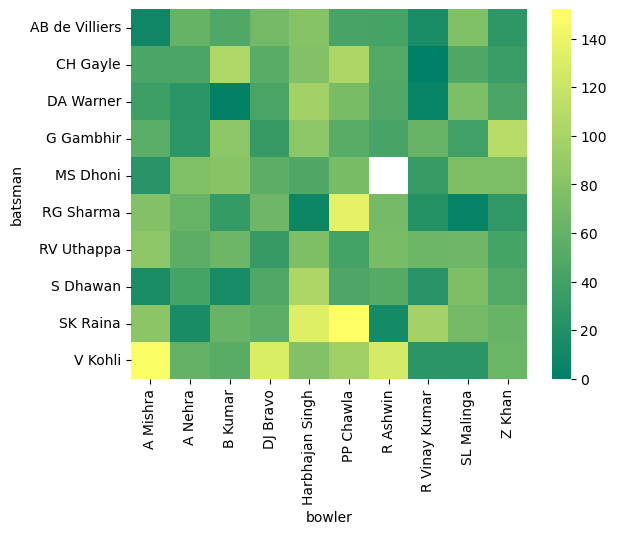

In [87]:
import seaborn as sns
sns.heatmap(y,cmap='summer')

In [88]:
mask1=ex['batsman']=='CH Gayle'
mask2=ex['bowler']=='A Mishra'
ex[mask1 & mask2].groupby('batsman')['batsman_runs'].sum()

batsman
CH Gayle    45
Name: batsman_runs, dtype: int64

## Qmost economical bowler in death overs  
Economy rate = runs conceeded / overs bowled  
Example if a bowler has given 35 runs in 3.1 overs  
so his overs bowled will be calculated as 3+1/6 = 3.1666  
and Economy rate would be 35/3.166 = 11.054

In [89]:
danger=delivery[delivery['over']>15].copy()

In [90]:
def over_conversion(over,ball):
    o=str(over-15)
    b=str(ball)
    return float(o+"."+b)
def econ_rate(runs,ball):
    return float(float(runs)/float(ball/6))

In [91]:
over_conversion(16,1)

1.1

In [92]:
danger['o']=0.0

In [93]:
# useful knowledge to update values
for i,row in danger.iterrows():
    result = over_conversion(row['over'],row['ball'])
    danger.at[i,'o']=result #way to update data in row

In [94]:
#Finding out each team's most economical bowler in death overs
danger=danger[['bowling_team','over','ball','o','bowler','total_runs']]
total_runs_given=danger.groupby(['bowling_team','bowler'])['total_runs'].sum().sort_values(ascending=False).reset_index()
total_balls_bowled=danger.groupby(['bowling_team','bowler'])['ball'].count().sort_values(ascending=False).reset_index()
runs_and_balls=total_runs_given.merge(total_balls_bowled,left_on=['bowling_team','bowler'],right_on=['bowling_team','bowler'])

In [95]:
# Just finding the most economical bowler without consideration which team he is from
danger=danger[['bowling_team','over','ball','o','bowler','total_runs']]
total_runs_given=danger.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).reset_index()
total_balls_bowled=danger.groupby('bowler')['ball'].count().sort_values(ascending=False).reset_index()
runs_and_balls=total_runs_given.merge(total_balls_bowled,left_on=['bowler'],right_on=['bowler'])

In [96]:
runs_and_balls['econ_rate']=0.0
#runs_and_balls['econ_rate']=runs_and_balls['total_runs']/(runs_and_balls['ball']/6)

In [97]:
for i,row in runs_and_balls.iterrows():
    result = econ_rate(row['total_runs'],row['ball'])
    runs_and_balls.at[i,'econ_rate']=result

In [98]:
runs_and_balls[runs_and_balls['ball']>100].sort_values('econ_rate').head(10)

,bowler,total_runs,ball,econ_rate
111,Sohail Tanvir,122,107,6.841121
13,SP Narine,790,664,7.138554
52,DE Bollinger,297,242,7.363636
1,SL Malinga,1300,1050,7.428571
72,A Kumble,217,174,7.482759
58,MA Starc,265,210,7.571429
76,Mustafizur Rahman,212,168,7.571429
30,R Ashwin,479,379,7.583113
104,J Botha,138,108,7.666667
10,DW Steyn,806,624,7.750000


In [99]:
runs_and_balls[runs_and_balls['ball']>=100].sort_values('econ_rate',ascending=True).drop_duplicates(subset=['bowling_team'],keep='first').reset_index()

KeyError: Index(['bowling_team'], dtype='object')

In [ ]:
a=df.groupby('batsman')['batsman_runs'].count() #counting number of balls

In [ ]:
b=df.groupby('batsman')['batsman_runs'].count()>200 # only need to take players who played more than 200 balls

In [ ]:
c=a[b].index.tolist()

In [ ]:
c

['A Mishra',
 'AB de Villiers',
 'AD Mathews',
 'AM Rahane',
 'AR Patel',
 'AT Rayudu',
 'BJ Hodge',
 'DA Miller',
 'DA Warner',
 'DJ Bravo',
 'DJ Hussey',
 'DPMD Jayawardene',
 'Harbhajan Singh',
 'IK Pathan',
 'JA Morkel',
 'JH Kallis',
 'JP Duminy',
 'JP Faulkner',
 'KA Pollard',
 'KD Karthik',
 'KM Jadhav',
 'LRPL Taylor',
 'MK Pandey',
 'MK Tiwary',
 'MS Dhoni',
 'NV Ojha',
 'P Kumar',
 'PP Chawla',
 'R Vinay Kumar',
 'RA Jadeja',
 'RG Sharma',
 'RV Uthappa',
 'S Badrinath',
 'S Dhawan',
 'SK Raina',
 'SPD Smith',
 'SS Tiwary',
 'STR Binny',
 'V Kohli',
 'WP Saha',
 'Y Venugopal Rao',
 'YK Pathan',
 'Yuvraj Singh']

In [ ]:
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
99,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,1,DJ Hooda,Yuvraj Singh,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
100,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,2,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
101,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,3,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
102,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
d=df[df['batsman'].isin(c)] #isin() function is used to find only those rows in which batsman names matches those names..
# stored in a list in c, this 

In [ ]:
runs=d.groupby('batsman')['batsman_runs'].sum()

In [ ]:
balls=d.groupby('batsman')['batsman_runs'].count()

In [ ]:
(runs/balls*100).sort_values(ascending=False)

batsman
AB de Villiers      211.052632
DA Warner           189.473684
DA Miller           186.666667
V Kohli             181.868132
RG Sharma           175.668449
DJ Hussey           175.213675
RV Uthappa          173.454545
Yuvraj Singh        171.124031
JH Kallis           170.562771
MS Dhoni            169.607843
SPD Smith           169.303797
JP Duminy           167.760618
DJ Bravo            167.726161
SK Raina            167.467249
AT Rayudu           165.411765
WP Saha             163.389831
KA Pollard          161.336516
YK Pathan           159.246575
S Dhawan            158.847737
BJ Hodge            157.402597
AM Rahane           152.985075
LRPL Taylor         152.941176
KD Karthik          152.051836
DPMD Jayawardene    152.032520
MK Pandey           151.785714
JA Morkel           149.882353
JP Faulkner         149.319728
S Badrinath         149.116608
Y Venugopal Rao     148.846154
Harbhajan Singh     147.607656
AD Mathews          147.058824
KM Jadhav           144.378698


### Q2) top 10 batsman, and top 10 bowlers with max number of wickets and combine them and make a heatmap which tells which top batsman has hitten most runs against a top bowler

In [ ]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()
#Finding the top 10 batsman and storing the names in a list using index.tolist() function

In [ ]:
top_batsman

['SK Raina',
 'V Kohli',
 'RG Sharma',
 'G Gambhir',
 'DA Warner',
 'RV Uthappa',
 'CH Gayle',
 'S Dhawan',
 'MS Dhoni',
 'AB de Villiers']

In [ ]:
delivery['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [ ]:
dismissal=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
#only in these cases the wicket credit is given to bowler

In [ ]:
out=delivery[delivery['dismissal_kind'].isin(dismissal)]
#Filtering out batsman who got out by the above ways

In [ ]:
bowler=out.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10).index.tolist()
#Taking out list of top 10 bowlers having most wickets

In [ ]:
len(out)

6673

In [ ]:
batsmandf=delivery[delivery['batsman'].isin(top_batsman)]
# fitlering out top10 batsman and storing in new variable 

In [ ]:
finaldf=batsmandf[batsmandf['bowler'].isin(bowler)]
# filtering out batsmans who faced the top10 batsmans

In [ ]:
finaldf.shape

(4625, 21)

In [ ]:
y=finaldf.pivot_table(index='bowler',columns='batsman',values='batsman_runs',aggfunc='sum')

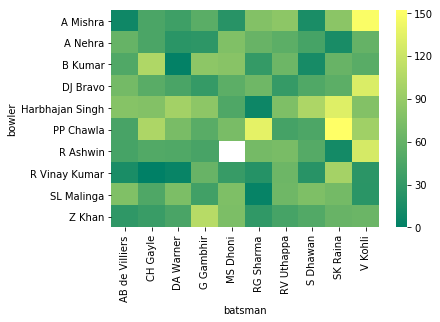

In [ ]:
sns.heatmap(y,cmap='summer')

## Q3) most economical bowler in death overs  
Economy rate = runs conceeded / overs bowled  
Example if a bowler has given 35 runs in 3.1 overs  
so his overs bowled will be calculated as 3+1/6 = 3.1666  
and Economy rate would be 35/3.166 = 11.054

In [ ]:
do=delivery[delivery['over']>15]
#we only need overs between 16 to 20 overs

In [ ]:
len(do)

33737

In [ ]:
a=do.groupby('bowler')['total_runs'].count() #Finding number of balls bowled by each bowler
a.sort_values(ascending=False)

bowler
SL Malinga           1050
DJ Bravo              885
B Kumar               715
R Vinay Kumar         673
SP Narine             664
UT Yadav              631
P Kumar               624
DW Steyn              624
Z Khan                620
SR Watson             611
RP Singh              556
A Nehra               546
L Balaji              523
IK Pathan             505
JP Faulkner           493
A Mishra              461
MM Sharma             454
JJ Bumrah             438
AB Dinda              428
M Morkel              402
RA Jadeja             396
CH Morris             381
R Ashwin              379
JH Kallis             371
I Sharma              358
JA Morkel             338
MJ McClenaghan        333
DS Kulkarni           330
B Lee                 328
PP Chawla             326
SK Trivedi            315
MM Patel              314
KA Pollard            310
PP Ojha               297
Sandeep Sharma        294
M Muralitharan        284
JD Unadkat            283
RJ Harris             281
KK Co

In [ ]:
b=do.groupby('bowler')['total_runs'].count()>100 #Only need bowlers who bowled more than 100 balls

In [ ]:
bowler=a[b].index.tolist() # storing bowler names in a list

In [ ]:
newdf=delivery[delivery['bowler'].isin(bowler)]

In [ ]:
newdf.shape

(110789, 21)

In [ ]:
run=newdf.groupby('bowler')['total_runs'].sum()

In [ ]:
balls=newdf.groupby('bowler')['total_runs'].count()

In [ ]:
balls=balls/6

In [ ]:
(run/balls).sort_values().head

<bound method NDFrame.head of bowler
Sohail Tanvir        6.226415
SP Narine            6.395706
R Ashwin             6.490886
DW Steyn             6.600278
A Kumble             6.646999
M Muralitharan       6.698292
SL Malinga           6.757238
DL Vettori           6.833121
J Botha              6.922426
Harbhajan Singh      6.931415
S Nadeem             7.029024
Mustafizur Rahman    7.038168
B Kumar              7.039922
R Sharma             7.058824
DP Nannes            7.097242
MA Starc             7.107843
Shakib Al Hasan      7.115100
Iqbal Abdulla        7.158006
DE Bollinger         7.160000
SK Warne             7.187244
M Kartik             7.197970
MF Maharoof          7.238095
WD Parnell           7.297837
A Mishra             7.336293
SK Raina             7.357143
Yuvraj Singh         7.373993
B Lee                7.375546
PP Ojha              7.400514
AR Patel             7.425000
R Bhatia             7.437688
SK Trivedi           7.491329
SW Tait              7.505618
MM 

### see the theory of 40

